## Customer Segmentation and Analysis using KMeans
In the bootcamp session we had worked on segmentation using Age and Spending Score.
The assignment is to do the same for Spending Score and Annual Income.

Kindly complete the following steps:
1. Apply KMeans with a range of K values (number of clusters) and store the inertia.
2. Plot the inertia values as a elbow curve to decide the optimal number of clusters.
3. Run the KMeans algorithm with the desired number of clusters and plot the results using a scatter plot.

### Importing required libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV filesI/O
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

### Data Load
    

In [2]:
df = pd.read_csv('customers.csv')
df.head()
df.shape

(200, 5)

### Segmentation using  Annual Income and Spending Score

KMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

iloc: http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html

In [3]:
'''Annual Income and Spending Score'''
X1 = df[['Annual Income (k$)', 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)
    
print(inertia)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37271.8862365895, 30259.65720728547, 25029.25342493588, 21806.812998695455, 19779.014121222186]


### Plot the Elbow curve

Pyplot: https://matplotlib.org/3.1.0/tutorials/introductory/pyplot.html

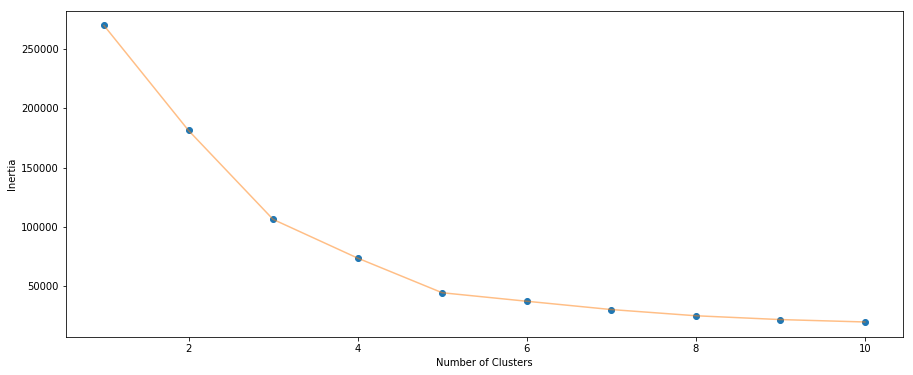

In [4]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(1, 11), inertia , 'o')
plt.plot(np.arange(1, 11), inertia , '-', alpha = 0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

### Apply KMeans with desired number of clusters

In [5]:
algorithm = (KMeans(n_clusters = 5, n_init = 10, max_iter=300))
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
print(centroids1)

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


### Plot the results using a scatter plot

Scatter Plot: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html

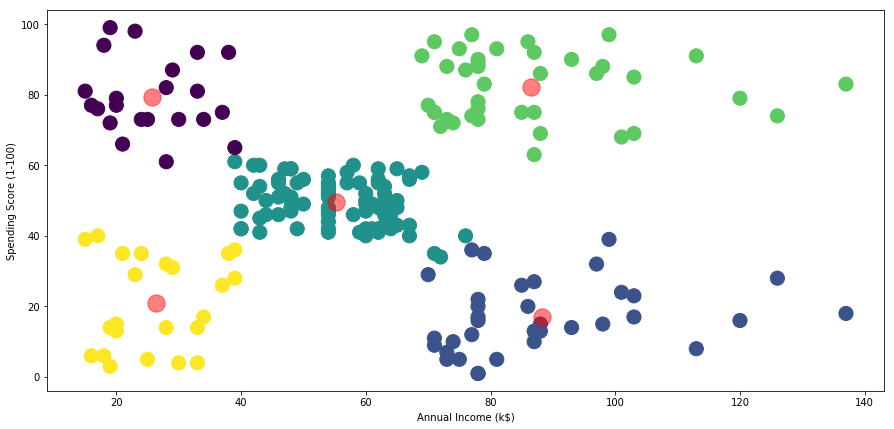

In [6]:
plt.figure(1, figsize = (15, 7))
plt.clf()

plt.scatter( x= 'Annual Income (k$)', y = 'Spending Score (1-100)' , data = df , c = labels1 , s = 200)
plt.scatter( x = centroids1[: , 0] , y = centroids1[: ,1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)'), plt.xlabel('Annual Income (k$)')
plt.show()